In [1]:
import pandas as pd

In [2]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
df_1 = pd.read_excel('./online_retail_II.xlsx', sheet_name='Year 2009-2010')
df_2 = pd.read_excel('./online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [3]:
df = pd.concat([df_1, df_2], ignore_index=True)

In [4]:
print(df.shape)
print(df.columns)

(1067371, 8)
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [6]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


# Cleaning & Feature Engineering

In [7]:
df = df.dropna(subset=['InvoiceDate', 'Customer ID'])

In [8]:
print(df.shape)

(824364, 8)


In [9]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [10]:
df = df[~df['Invoice'].astype(str).str.startswith('C')]

In [11]:
print(df.shape)

(805620, 8)


In [12]:
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]

In [13]:
print(df.shape)

(805549, 8)


In [14]:
805620 - 805549

71

In [15]:
# Add new features 

df['Revenue'] = df['Quantity'] * df['Price'] # (feature engineering)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M').astype(str) # (feature engineering)
# 2009-01
# 2009-03

In [16]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12


# What is matplotlib

In [17]:
# matplotlib --> seaborn, pandas plot

In [18]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12


In [19]:
import matplotlib.pyplot as plt

In [20]:
monthly_revenue = df.groupby('Month')['Revenue'].sum().sort_index()

In [21]:
monthly_revenue

Month
2009-12     686654.160
2010-01     557319.062
2010-02     506371.066
2010-03     699608.991
2010-04     594609.192
2010-05     599985.790
2010-06     639066.580
2010-07     591636.740
2010-08     604242.650
2010-09     831615.001
2010-10    1036680.000
2010-11    1172336.042
2010-12     884591.890
2011-01     569445.040
2011-02     447137.350
2011-03     595500.760
2011-04     469200.361
2011-05     678594.560
2011-06     661213.690
2011-07     600091.011
2011-08     645343.900
2011-09     952838.382
2011-10    1039318.790
2011-11    1161817.380
2011-12     518210.790
Name: Revenue, dtype: float64

In [22]:
monthly_revenue.head()

Month
2009-12    686654.160
2010-01    557319.062
2010-02    506371.066
2010-03    699608.991
2010-04    594609.192
Name: Revenue, dtype: float64

# line - plot

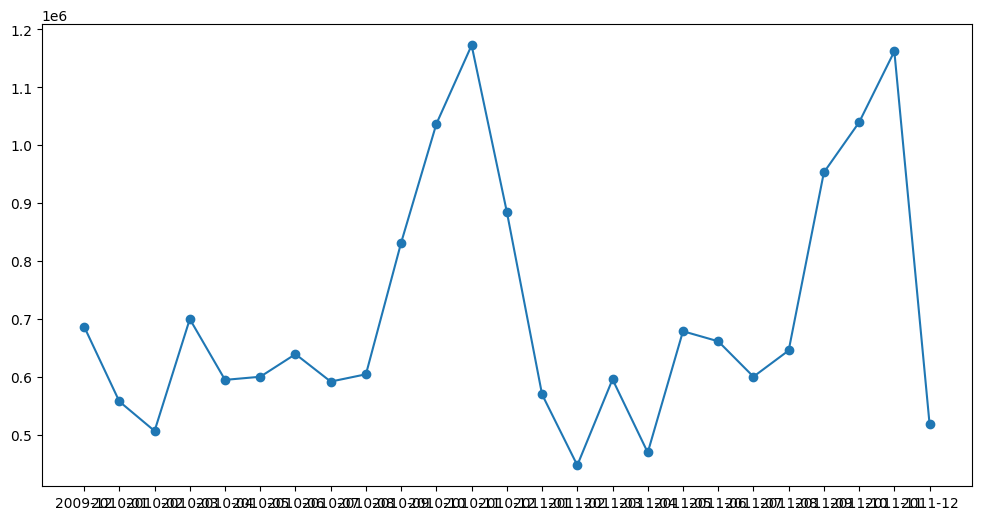

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o') # o means circle
plt.show()

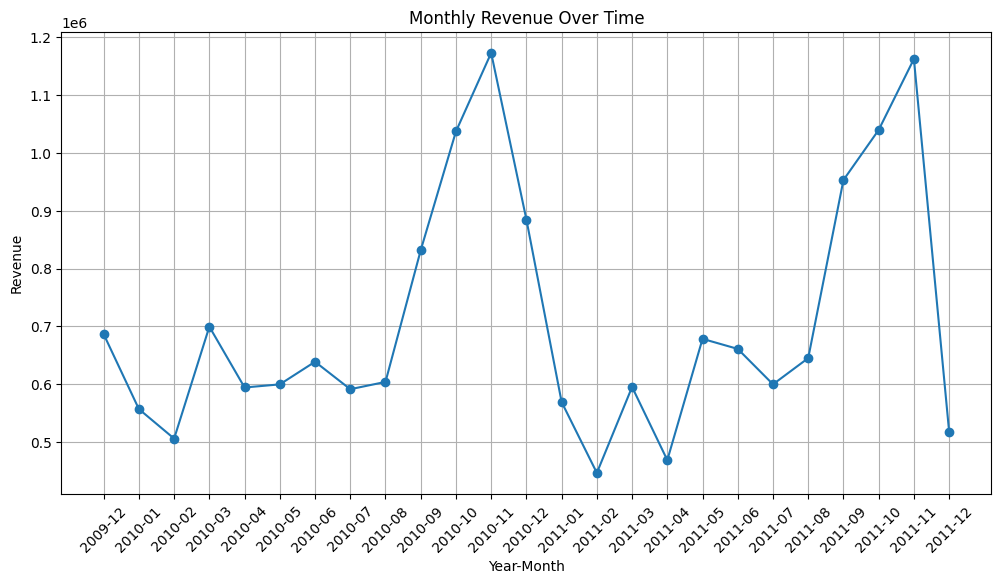

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o') # o means circle
plt.xticks(rotation=45)
plt.title('Monthly Revenue Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.grid(True) 
plt.show()

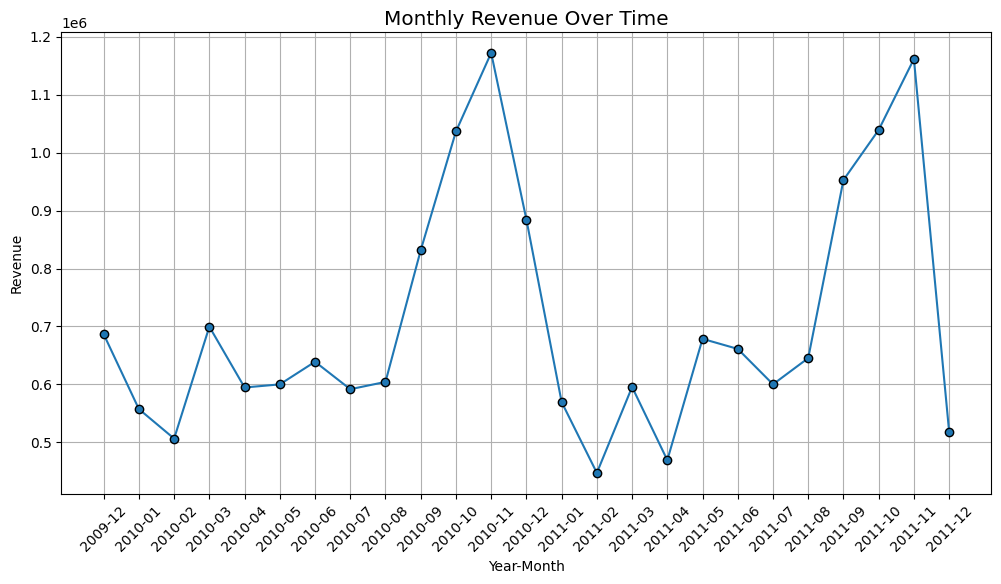

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o') # o means circle
plt.xticks(rotation=45)
plt.style.use('classic')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.grid(True) 
plt.show()

In [26]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


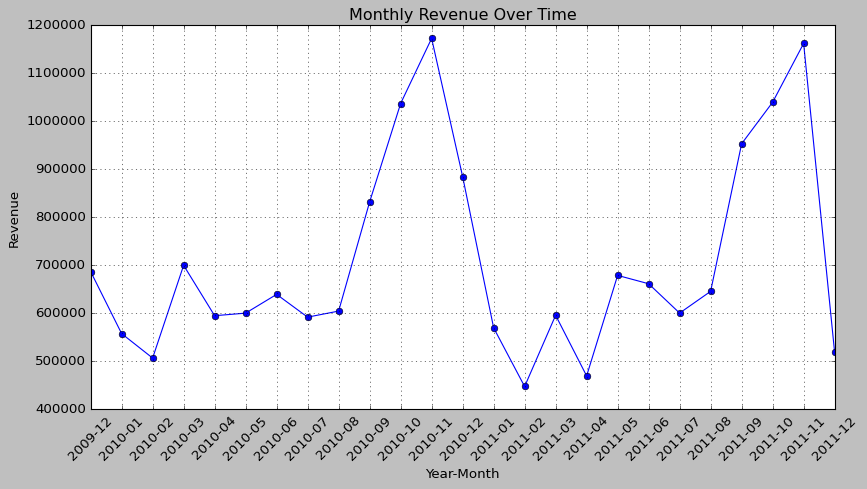

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o') # o means circle
plt.xticks(rotation=45)
plt.style.use('classic')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.grid(True) 
plt.savefig("monthly_revenue_plot.png", dpi=300)

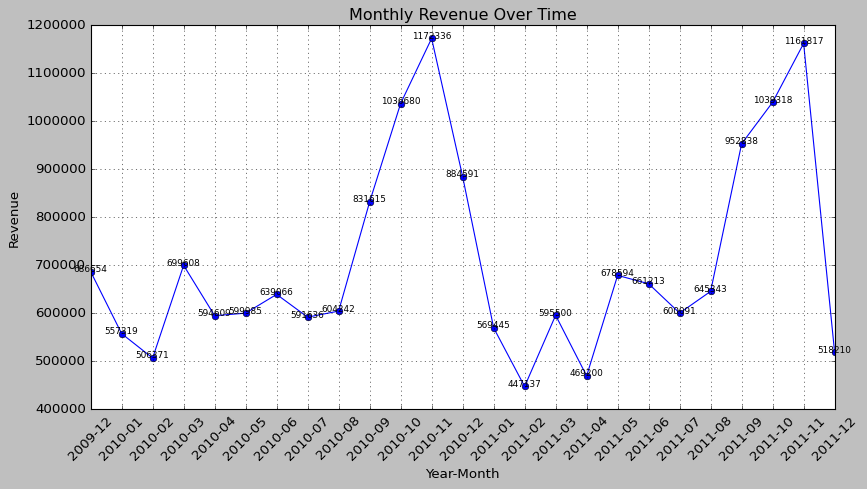

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o') # o means circle
plt.xticks(rotation=45)
plt.style.use('ggplot')
plt.title('Monthly Revenue Over Time')

for i, value in enumerate(monthly_revenue.values):
    plt.text(monthly_revenue.index[i], value, f"{int(value)}", ha='center', fontsize=8)


plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.grid(True) 
plt.show()

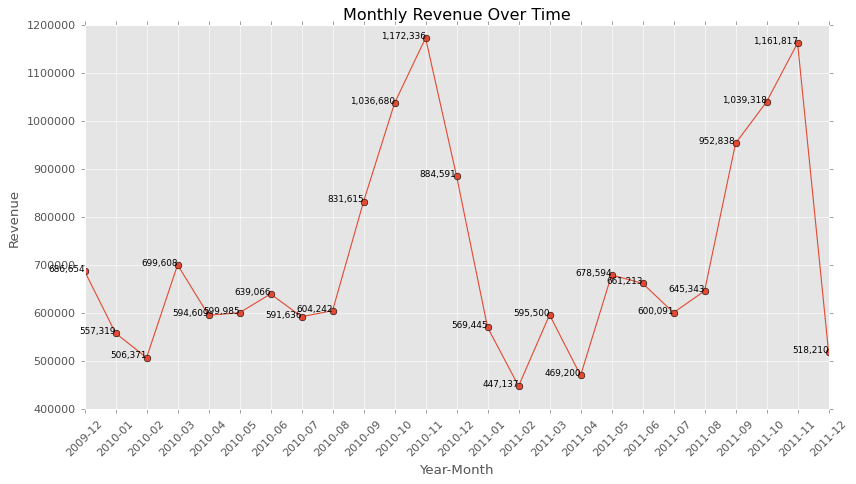

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o') # o means circle
plt.xticks(rotation=45)
plt.style.use('ggplot')
plt.title('Monthly Revenue Over Time')

for i, value in enumerate(monthly_revenue.values):
    plt.text(monthly_revenue.index[i], value, f"{int(value):,}", ha='right', color='black',fontsize=8)


plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.grid(True) 
plt.show()

# 1000 > 1,000
# 10000 > 10, 0000

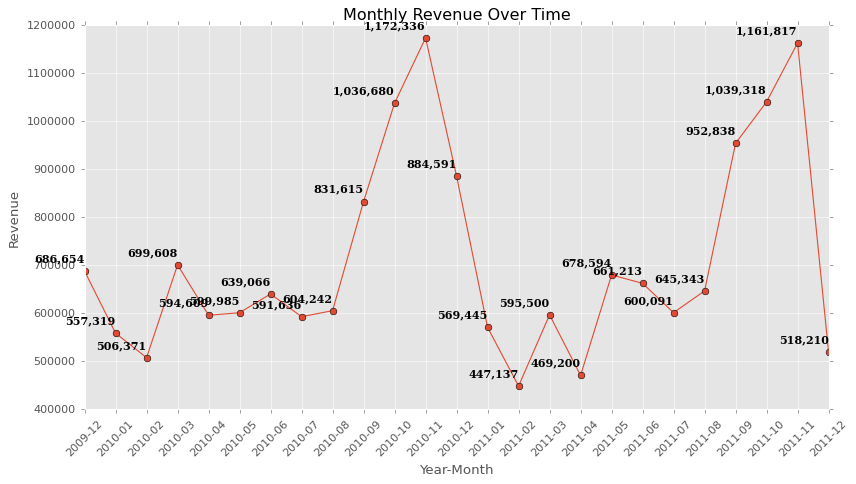

In [30]:
font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'bold',
    'size': 10,
}

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o') # o means circle
plt.xticks(rotation=45)
plt.style.use('ggplot')
plt.title('Monthly Revenue Over Time')

for i, value in enumerate(monthly_revenue.values):
    plt.text(monthly_revenue.index[i], value+20000, f"{int(value):,}", fontdict=font, ha='right')


plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.grid(True) 
plt.show()

In [31]:
# Show top 10 revenue-generating countries

In [32]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

In [33]:
country_revenue

Country
United Kingdom    1.472315e+07
EIRE              6.216311e+05
Netherlands       5.542323e+05
Germany           4.312625e+05
France            3.552575e+05
Australia         1.699681e+05
Spain             1.091785e+05
Switzerland       1.003653e+05
Sweden            9.154972e+04
Denmark           6.986219e+04
Name: Revenue, dtype: float64

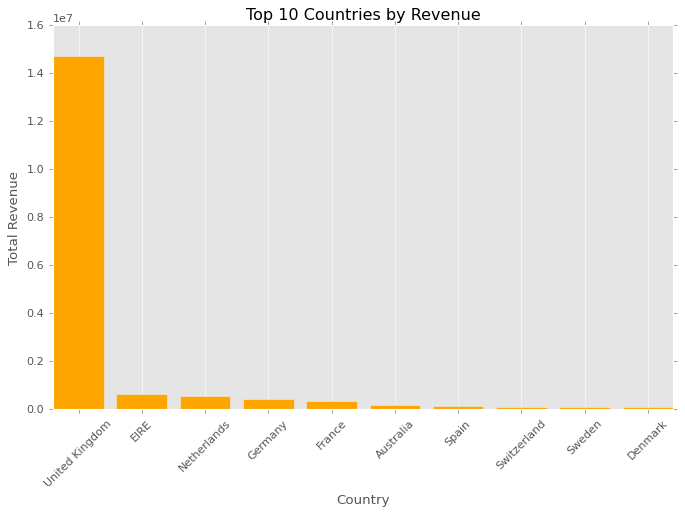

In [34]:
# Bar plot

plt.figure(figsize=(10, 6))
plt.bar(country_revenue.index, country_revenue.values, color='orange')

# Customizations
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

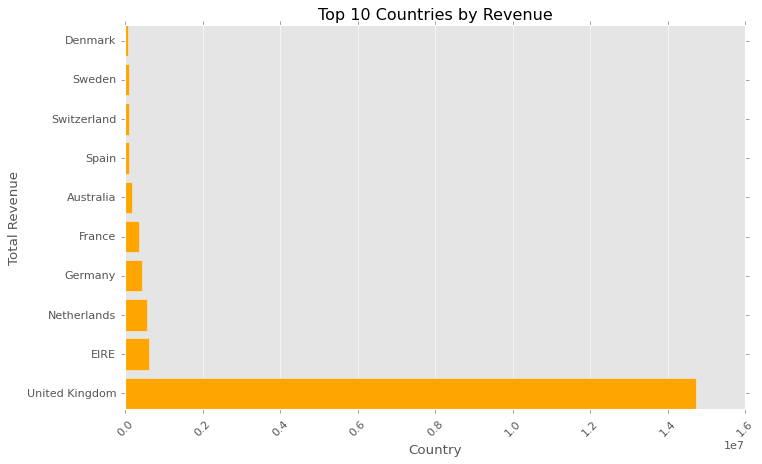

In [35]:
# Bar plot

plt.figure(figsize=(10, 6))
plt.barh(country_revenue.index, country_revenue.values, color='orange')

# Customizations
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

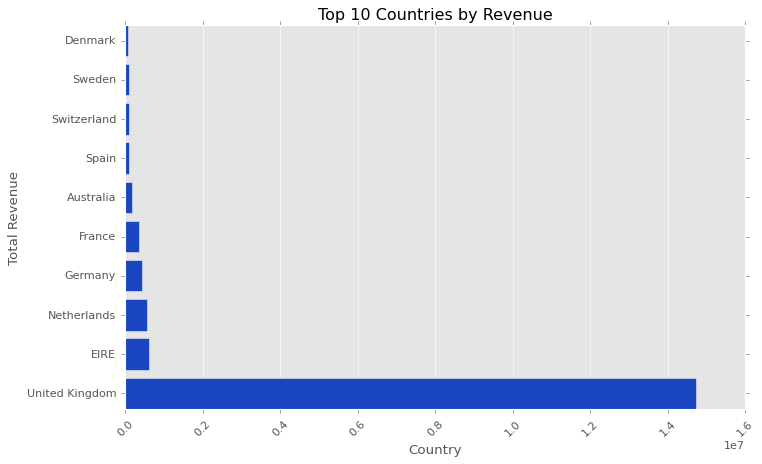

In [36]:
# Bar plot

plt.figure(figsize=(10, 6))
plt.barh(country_revenue.index, country_revenue.values, color='#1945C1')
# #1945c1 

# Customizations
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

In [37]:
import random

In [38]:
random.seed(123)

In [39]:
random_number = random.randint(1, 100) 
print(random_number)

7


In [40]:
random_number = random.randint(1, 100) 
print(random_number)

35


In [41]:
# scatter plot

sample_df = df.sample(100, random_state=1)

In [42]:
sample_df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Month
860936,566288,23236,STORAGE TIN VINTAGE DOILY,6,2011-09-11 15:18:00,2.89,12883.0,United Kingdom,17.34,2011-09
1009407,577516,51014L,"FEATHER PEN,LIGHT PINK",12,2011-11-20 13:08:00,0.39,16533.0,United Kingdom,4.68,2011-11
904439,569670,23507,MINI PLAYING CARDS BUFFALO BILL,1,2011-10-05 13:47:00,0.42,14730.0,United Kingdom,0.42,2011-10
298927,518505,37471,MULTICOLOUR DOTS PLATE,684,2010-08-09 13:10:00,0.10,14277.0,France,68.40,2010-08
245386,513123,22425,ENAMEL COLANDER CREAM,3,2010-06-22 10:24:00,4.95,12359.0,Cyprus,14.85,2010-06
239790,512564,82583,HOT BATHS METAL SIGN,1,2010-06-16 14:34:00,2.10,14375.0,United Kingdom,2.10,2010-06
529603,536749,22441,GROW YOUR OWN BASIL IN ENAMEL MUG,1,2010-12-02 13:49:00,2.10,17976.0,United Kingdom,2.10,2010-12
66203,495310,20726,LUNCH BAG WOODLAND,10,2010-01-22 14:17:00,1.65,12531.0,Germany,16.50,2010-01
549128,538208,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-10 11:39:00,4.95,14037.0,United Kingdom,4.95,2010-12
674443,549262,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,2011-04-07 12:38:00,3.75,14465.0,United Kingdom,3.75,2011-04


In [43]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 860936 to 347550
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      100 non-null    object        
 1   StockCode    100 non-null    object        
 2   Description  100 non-null    object        
 3   Quantity     100 non-null    int64         
 4   InvoiceDate  100 non-null    datetime64[ns]
 5   Price        100 non-null    float64       
 6   Customer ID  100 non-null    float64       
 7   Country      100 non-null    object        
 8   Revenue      100 non-null    float64       
 9   Month        100 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 8.6+ KB


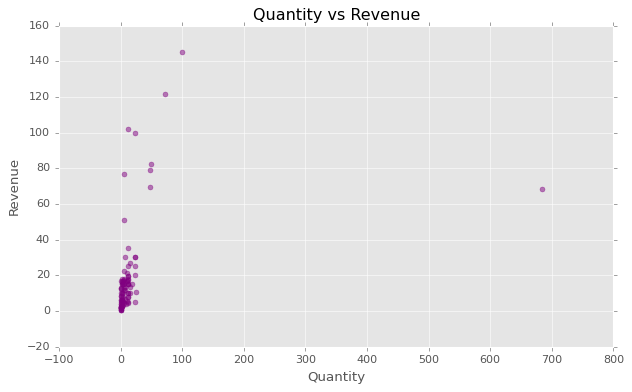

In [44]:
plt.figure(figsize=(8, 5))
plt.scatter(sample_df['Quantity'], sample_df['Revenue'], alpha=0.5, color='purple')
plt.xlabel("Quantity")
plt.ylabel("Revenue")
plt.title("Quantity vs Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
# Sub-Plots : Multiple charts in one figure

In [46]:
# P.S : Compare PLOT(1)monthly revenue by PLOT(2) monthly quantity

In [47]:
monthly_quantity = df.groupby('Month')['Quantity'].sum().sort_index()

In [48]:
monthly_quantity.head()

Month
2009-12    400153
2010-01    370921
2010-02    372761
2010-03    503466
2010-04    352025
Name: Quantity, dtype: int64

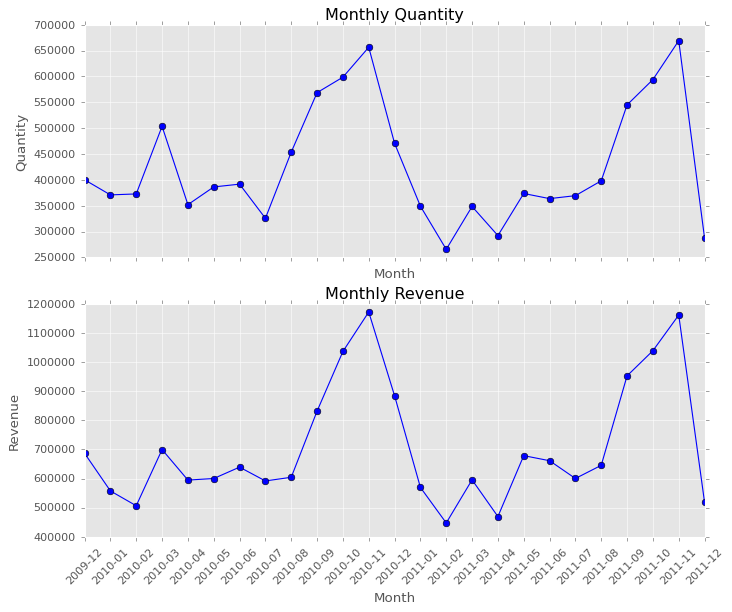

In [49]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

axs[0].plot(monthly_quantity.index, monthly_quantity.values, marker='o', color='blue', label='Quantity')
axs[0].set_title("Monthly Quantity")
axs[0].set_xlabel("Month")
axs[0].set_ylabel("Quantity")
axs[0].grid(True)

axs[1].plot(monthly_revenue.index, monthly_revenue.values, marker='o', color='blue', label='Revenue')
axs[1].set_title("Monthly Revenue")
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Revenue")
axs[1].grid(True)

plt.xticks(rotation=45)
plt.show()

# Seaborn

In [50]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [51]:
import seaborn as sns

In [52]:
# Distribution of Quantity per Transaction

In [53]:
df_quantity = df[(df['Quantity'] > 0) & (df['Quantity'] < 100)]

In [54]:
# 1,2,3,....99 --> hist --> freq
# 99 column
# 1-10 --> bar
# 11-20 --> bar

# bins = 10

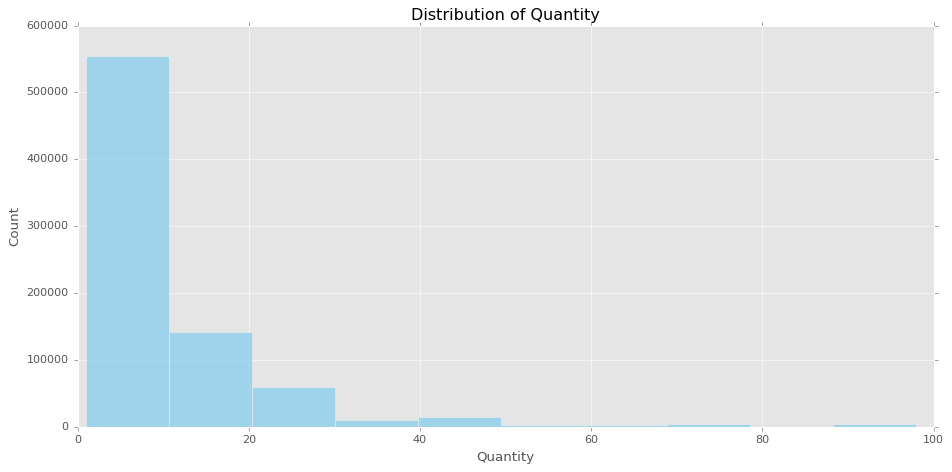

In [55]:
plt.figure(figsize=(12, 6))
sns.histplot(df_quantity['Quantity'], bins=10, kde=False, color='skyblue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

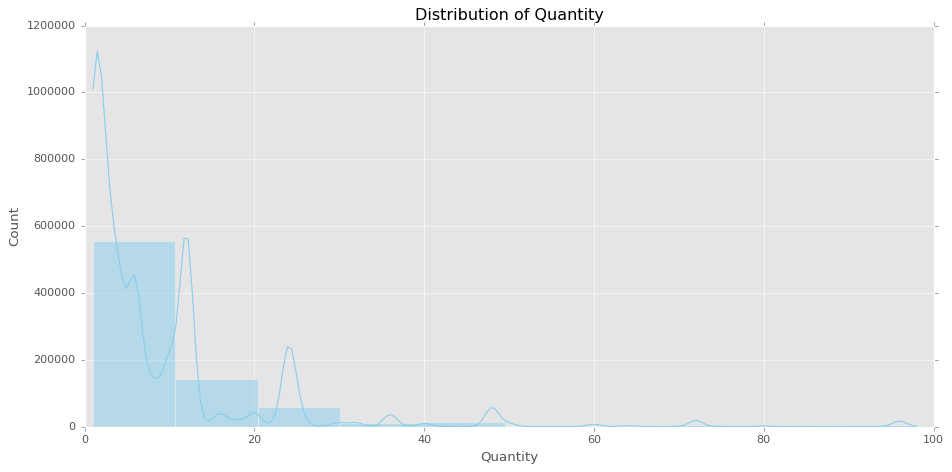

In [56]:
plt.figure(figsize=(12, 6))
sns.histplot(df_quantity['Quantity'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

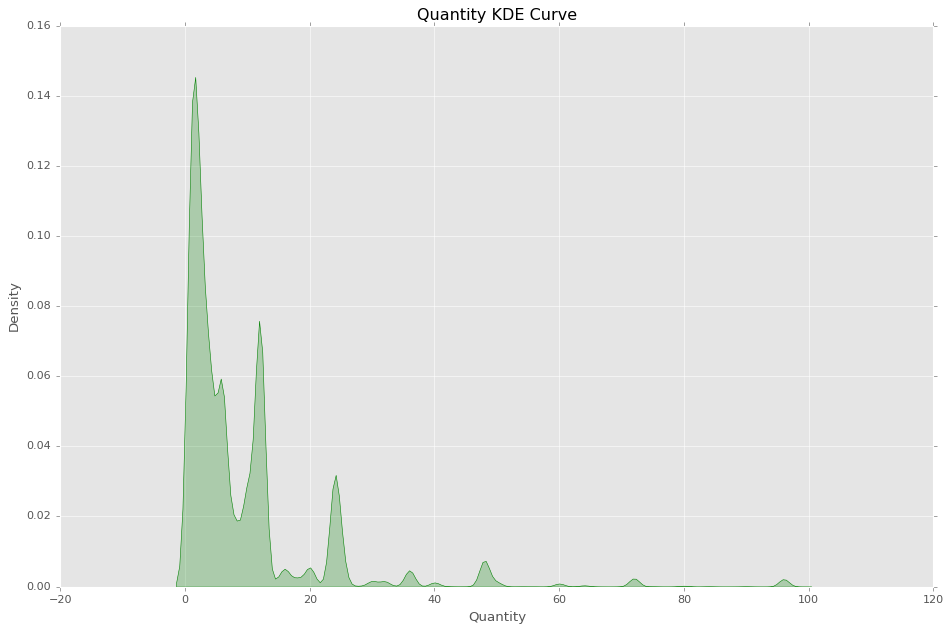

In [57]:
plt.figure(figsize=(12, 8))
sns.kdeplot(df_quantity['Quantity'], fill=True, color='green')
plt.title('Quantity KDE Curve')
plt.xlabel('Quantity')
plt.tight_layout()
plt.show()

In [58]:
# Categorical data Visualization

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805549 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805549 non-null  object        
 1   StockCode    805549 non-null  object        
 2   Description  805549 non-null  object        
 3   Quantity     805549 non-null  int64         
 4   InvoiceDate  805549 non-null  datetime64[ns]
 5   Price        805549 non-null  float64       
 6   Customer ID  805549 non-null  float64       
 7   Country      805549 non-null  object        
 8   Revenue      805549 non-null  float64       
 9   Month        805549 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 67.6+ MB


In [60]:
# Top Countries by Revenue (Bar Plot) (top-10)

In [61]:
top_countries = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

In [62]:
top_countries.head()

Country
United Kingdom    1.472315e+07
EIRE              6.216311e+05
Netherlands       5.542323e+05
Germany           4.312625e+05
France            3.552575e+05
Name: Revenue, dtype: float64

C:\Users\scl\AppData\Local\Temp\ipykernel_21212\3104011613.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


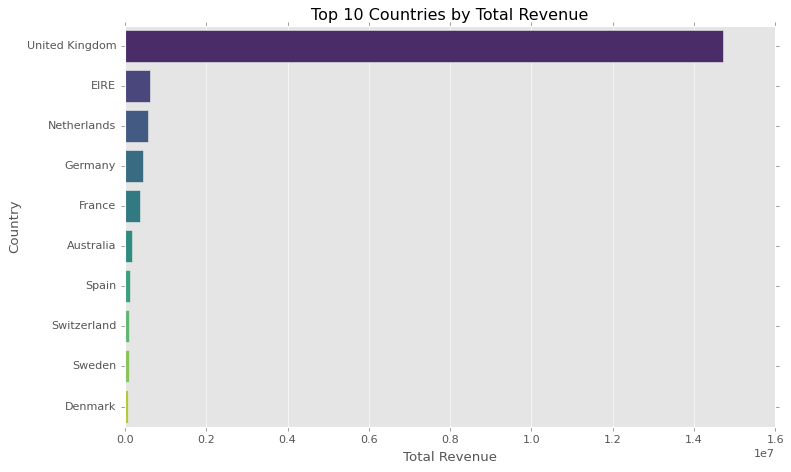

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

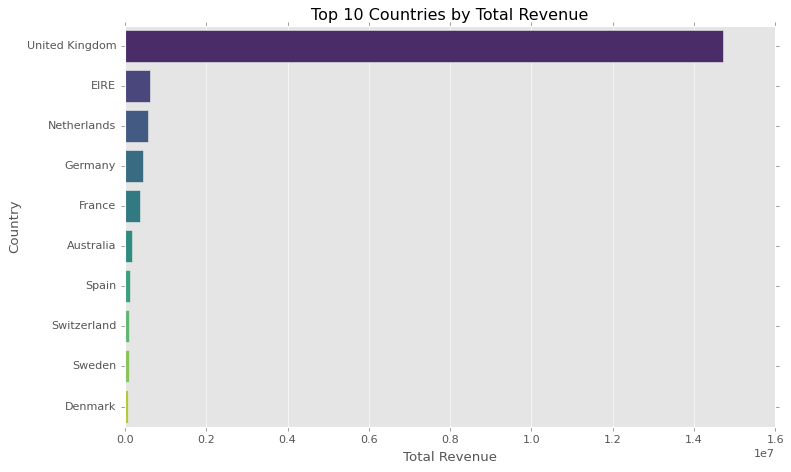

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

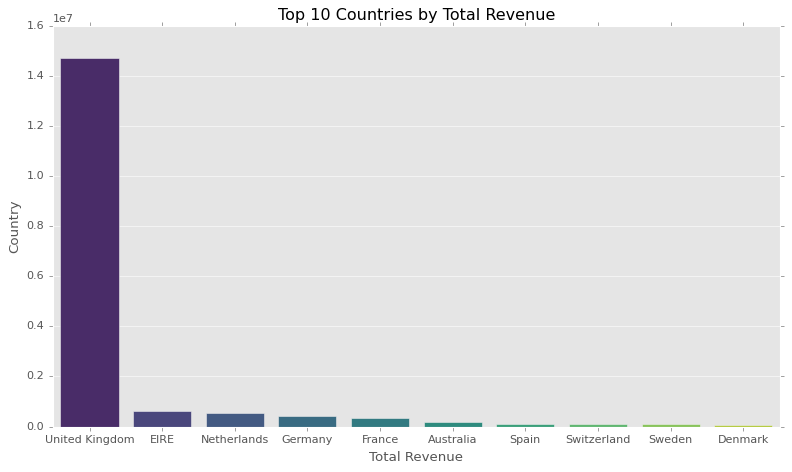

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, hue=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [66]:
# Number of Transactions by Country (Count Plot)

In [67]:
df_sample = df[['Quantity', 'Price', 'Revenue', 'Country', 'Month']].copy()

In [68]:
df_sample.head()

,Quantity,Price,Revenue,Country,Month
0,12,6.95,83.4,United Kingdom,2009-12
1,12,6.75,81.0,United Kingdom,2009-12
2,12,6.75,81.0,United Kingdom,2009-12
3,48,2.10,100.8,United Kingdom,2009-12
4,24,1.25,30.0,United Kingdom,2009-12


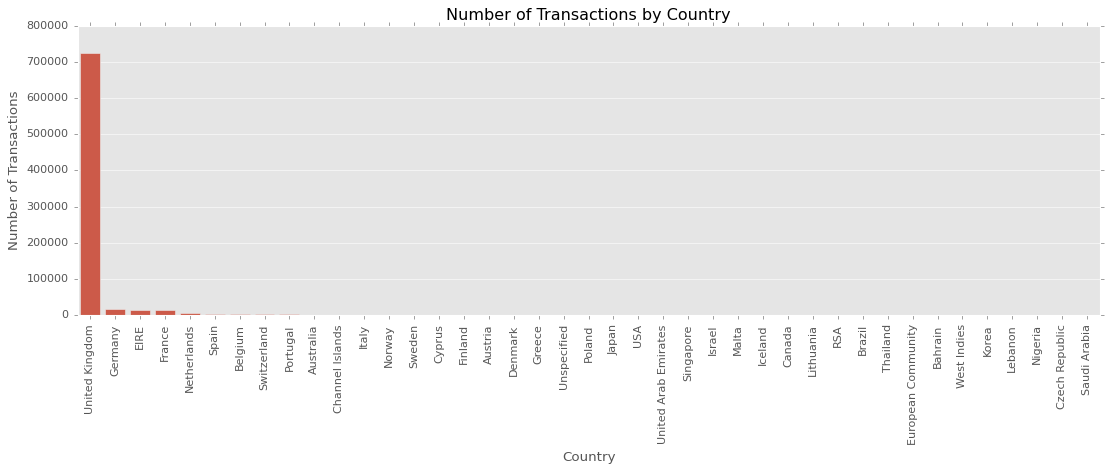

In [69]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_sample, x='Country', order=df_sample['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

In [70]:
# Top 5 countries by number of transactions

top_countries = df['Country'].value_counts().head(5).index.tolist()

# Filter df to keep only those countries
df_top = df[df['Country'].isin(top_countries)].copy()

# Group by Country and Month, Sum the revenue
grouped = df_top.groupby(['Country', 'Month'])['Revenue'].sum().reset_index()

In [71]:
grouped.head()

,Country,Month,Revenue
0,EIRE,2009-12,18170.46
1,EIRE,2010-01,65031.41
2,EIRE,2010-02,20206.46
3,EIRE,2010-03,22989.46
4,EIRE,2010-04,20668.08


In [72]:
grouped['Month'] = pd.to_datetime(grouped['Month'])
grouped = grouped.sort_values('Month')
grouped['Month'] = grouped['Month'].dt.strftime('%Y-%m')

# sort the data by YEAR-month

In [73]:
grouped.head()

,Country,Month,Revenue
0,EIRE,2009-12,18170.46
100,United Kingdom,2009-12,613214.90
25,France,2009-12,6521.69
75,Netherlands,2009-12,15204.73
50,Germany,2009-12,10096.85


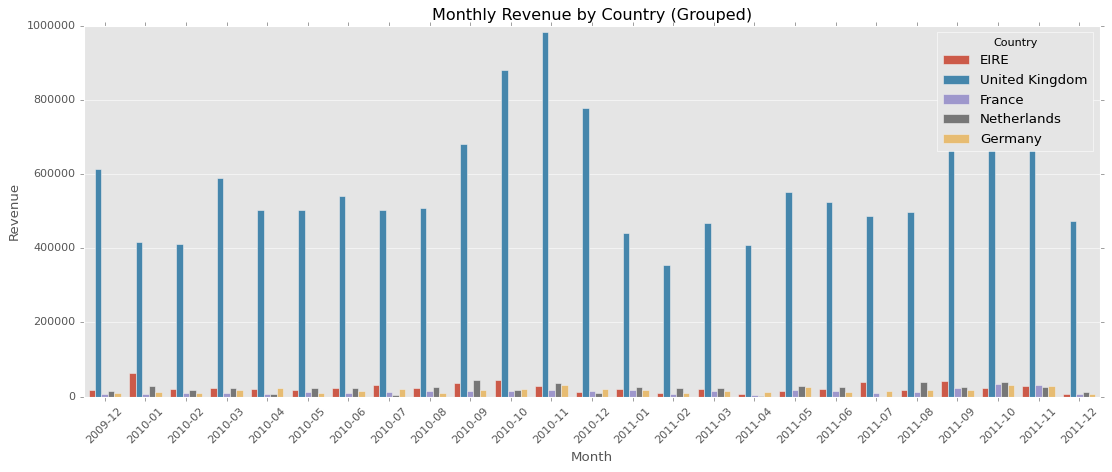

In [74]:
# Grouped Bar Plot using Seaborn

plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, x='Month', y='Revenue', hue='Country')
plt.title('Monthly Revenue by Country (Grouped)')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Country')
plt.show()

In [75]:
pivot_df = grouped.pivot(index='Month', columns='Country', values='Revenue').fillna(0)

In [76]:
pivot_df.head()

Country,EIRE,France,Germany,Netherlands,United Kingdom
Month,,,,,
2009-12,18170.46,6521.69,10096.850,15204.73,613214.900
2010-01,65031.41,8465.63,12562.110,29230.77,416635.242
2010-02,20206.46,9024.16,9124.250,17255.39,411077.936
2010-03,22989.46,8657.59,16698.080,24447.98,589725.011
2010-04,20668.08,7405.18,23683.231,6888.78,503425.741


[18170.46 65031.41 20206.46 22989.46 20668.08 18447.91 22934.34 31987.23
 22919.36 36349.13 43929.86 27717.73 13547.66 21904.19 10126.52 21674.36
  7570.5  15982.19 19835.99 40905.15 16967.38 40995.49 24317.92 29473.41
  6978.92]
[24692.15 73497.04 29230.62 31647.05 28073.26 32406.06 32106.88 43395.38
 39489.68 50880.46 59141.63 46716.22 29454.39 39644.31 18642.48 36263.91
 13100.11 33597.07 35914.96 50905.34 30778.34 64423.53 57803.37 60810.5
 14273.84]
[34789.    86059.15  38354.87  48345.13  51756.491 41514.42  47785.51
 63669.67  49432.8   68620.64  80703.26  76956.73  50379.61  56555.15
 28223.53  50656.6   25415.65  59348.27  49189.06  67346.32  49999.11
 82514.75  89441.79  88835.52  22258.01 ]
[ 49993.73  115289.92   55610.26   72793.11   58645.271  63930.95
  72010.02   69203.96   74461.49  113657.78   97969.11  113015.47
  59356.69   83166.31   51235.44   73073.09   28392.21   88534.15
  76047.15   67372.34   90326.92  109452.01  130150.44  114709.53
  33986.03 ]
[ 663208.63 

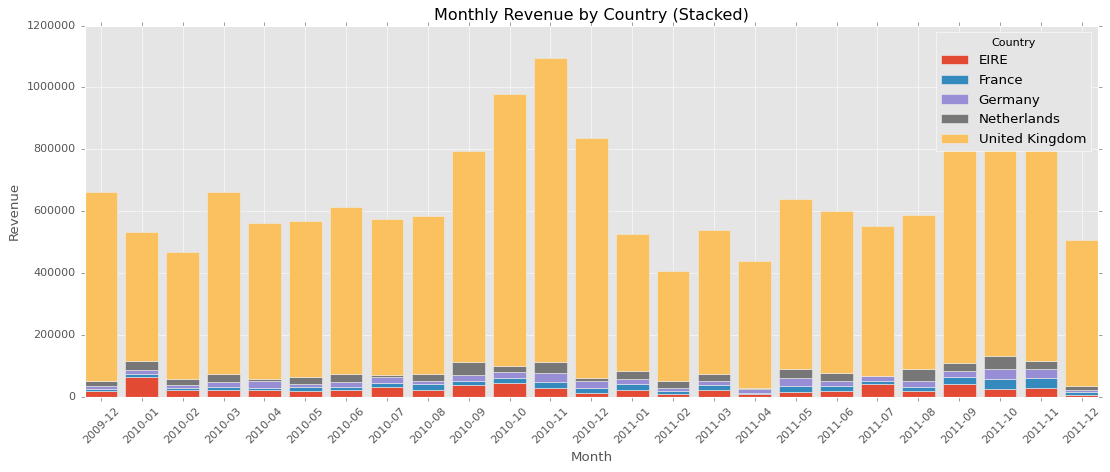

In [77]:
plt.figure(figsize=(14, 6))
bottom = None

for country in pivot_df.columns:
    plt.bar(pivot_df.index, pivot_df[country], label=country, bottom=bottom)
    # print(pivot_df[country])
    # print("----")
    bottom = pivot_df[country] if bottom is None else bottom + pivot_df[country]
    print(bottom.values)
    # print("=====")

plt.title('Monthly Revenue by Country (Stacked)')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

In [78]:
# scatter plot

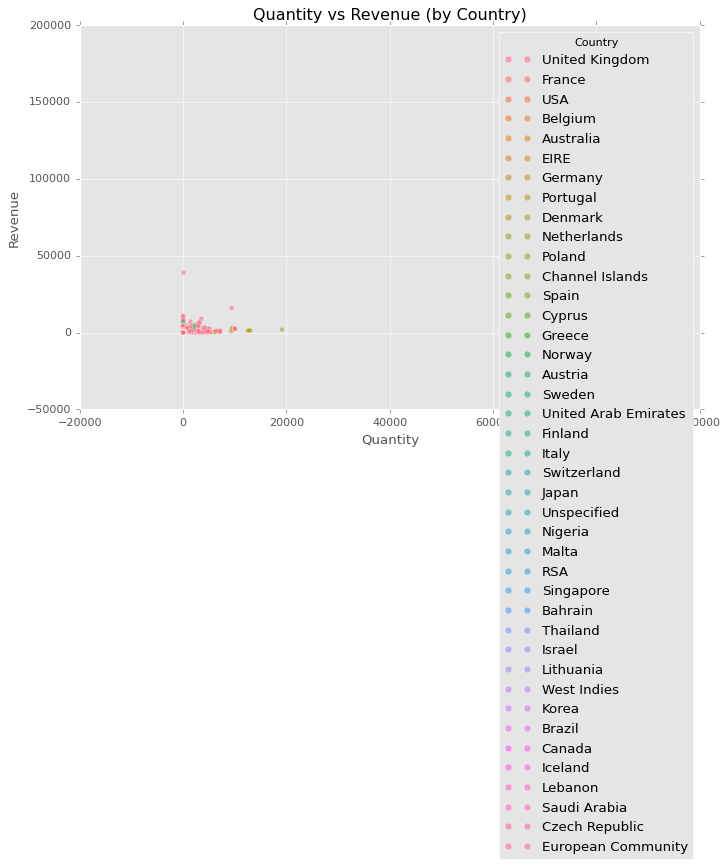

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x='Quantity', y='Revenue', hue='Country', alpha=0.6)
plt.title("Quantity vs Revenue (by Country)")
plt.xlabel("Quantity")
plt.ylabel("Revenue")
plt.show()

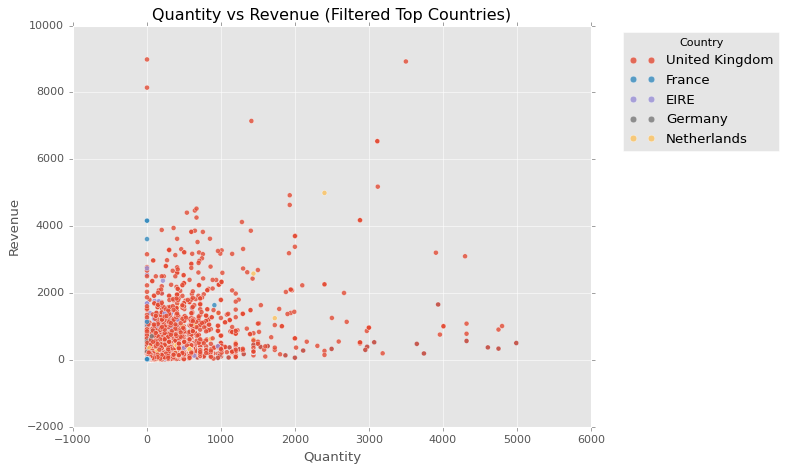

In [80]:
df_filtered = df_sample[(df_sample['Quantity'] > 0) & 
                        (df_sample['Quantity'] < 5000) & 
                        (df_sample['Revenue'] < 10000) & 
                        (df_sample['Revenue'] > 0)]

# Focus on top countries
top_countries = df_filtered['Country'].value_counts().head(5).index
df_filtered = df_filtered[df_filtered['Country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='Quantity', y='Revenue', hue='Country', alpha=0.8)
plt.title("Quantity vs Revenue (Filtered Top Countries)")
plt.xlabel("Quantity")
plt.ylabel("Revenue")

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

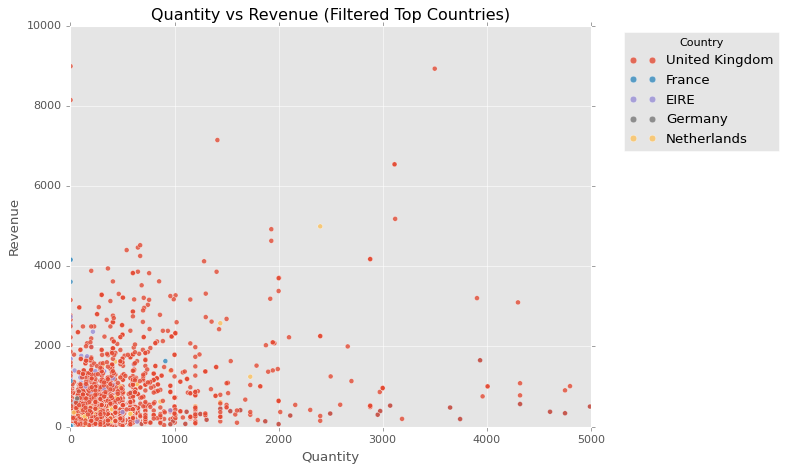

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='Quantity', y='Revenue', hue='Country', alpha=0.8)
plt.title("Quantity vs Revenue (Filtered Top Countries)")
plt.xlabel("Quantity")
plt.ylabel("Revenue")

plt.xlim(0, 5000)
plt.ylim(0, 10000)

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

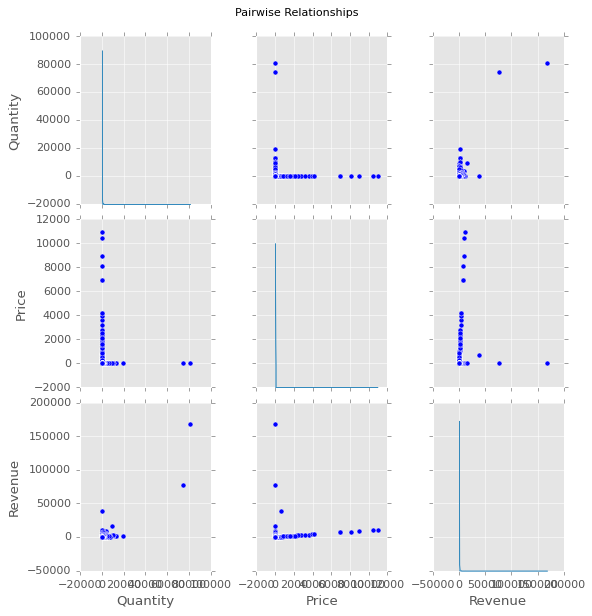

In [82]:
# sns.pairplot()

sns.pairplot(df_sample[['Quantity', 'Price', 'Revenue']], diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

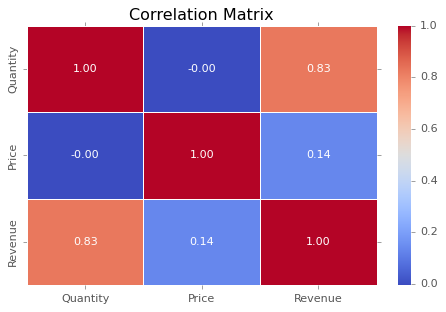

In [83]:
# sns.heatmap() Correlation Matrix

corr_matrix = df_sample[['Quantity', 'Price', 'Revenue']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [84]:
corr_matrix

,Quantity,Price,Revenue
Quantity,1.000000,-0.004909,0.826590
Price,-0.004909,1.000000,0.135897
Revenue,0.826590,0.135897,1.000000


C:\Users\scl\AppData\Local\Temp\ipykernel_21212\2831740665.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_revenue.index, y=country_revenue.values, palette='magma')


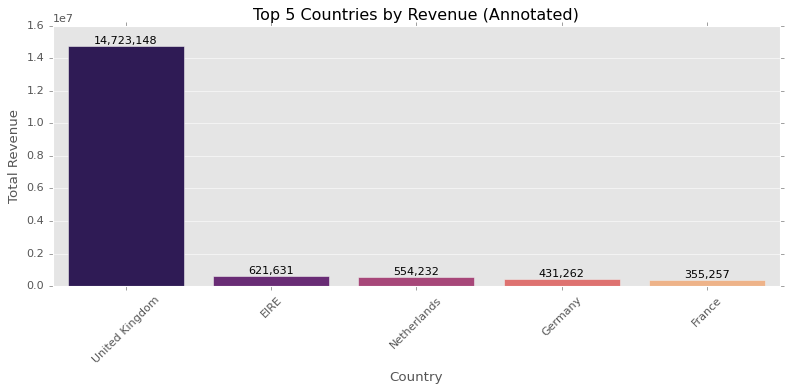

In [85]:
# Annotating Plots

country_revenue = df_sample.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 5))
sns.barplot(x=country_revenue.index, y=country_revenue.values, palette='magma')

# Annotating each bar with value
for i, value in enumerate(country_revenue.values):
    plt.text(i, value + 1000, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)

plt.title("Top 5 Countries by Revenue (Annotated)")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\scl\AppData\Local\Temp\ipykernel_21212\932696592.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sample[df_sample['Country'].isin(['Germany', 'France', 'United Kingdom'])],


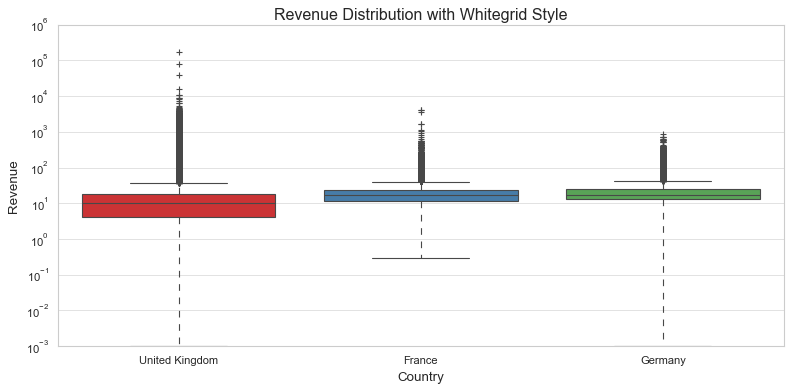

In [86]:
# styles and themes

sns.set_style("whitegrid")  # sets overall look

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_sample[df_sample['Country'].isin(['Germany', 'France', 'United Kingdom'])],
            x='Country', y='Revenue', palette='Set1')
sns.despine(left=False, bottom=False, top=False, right=False)  # removes top and right border

plt.title("Revenue Distribution with Whitegrid Style")
plt.yscale('log')
plt.tight_layout()
plt.show()

C:\Users\scl\AppData\Local\Temp\ipykernel_21212\2367028909.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sample[df_sample['Country'].isin(['Germany', 'France', 'United Kingdom'])],


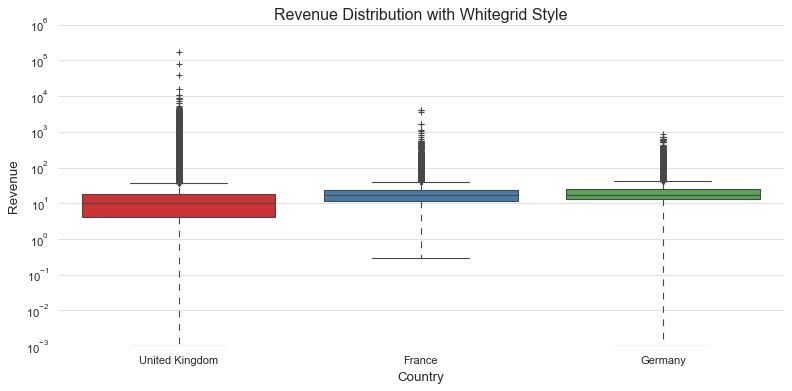

In [87]:
# styles and themes

sns.set_style("whitegrid")  # sets overall look

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_sample[df_sample['Country'].isin(['Germany', 'France', 'United Kingdom'])],
            x='Country', y='Revenue', palette='Set1')
sns.despine(left=True, bottom=True)  # removes top and right border

plt.title("Revenue Distribution with Whitegrid Style")
plt.yscale('log')
plt.tight_layout()
plt.show()

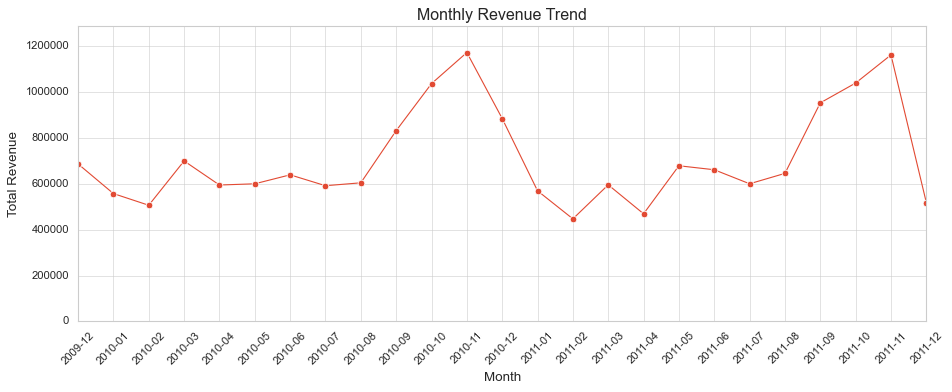

In [88]:
monthly_rev = df_sample.groupby('Month')['Revenue'].sum().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_rev.index, y=monthly_rev.values, marker='o')

plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.ylim(0, monthly_rev.max() * 1.1)  # setting y-limit
plt.ylabel("Total Revenue")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

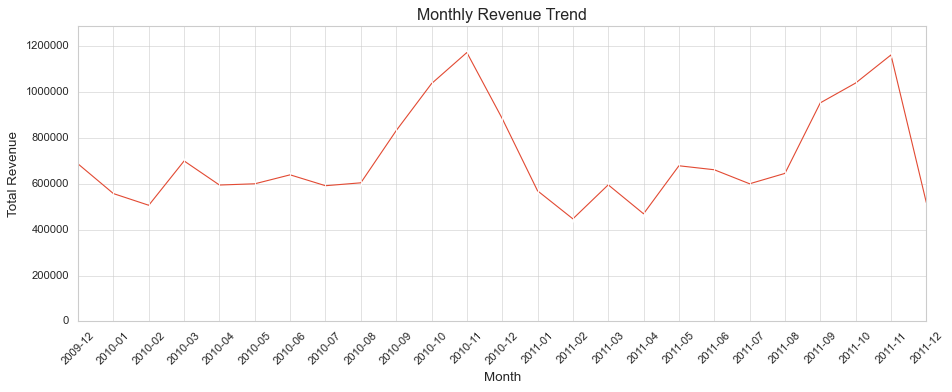

In [89]:
monthly_rev = df_sample.groupby('Month')['Revenue'].sum().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_rev.index, y=monthly_rev.values, marker='|')

plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.ylim(0, monthly_rev.max() * 1.1)  # setting y-limit
plt.ylabel("Total Revenue")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

In [90]:
# Combining Plots with FacetGrid

top3 = ['United Kingdom', 'Germany', 'France']
df_subset = df[df['Country'].isin(top3)].copy()

df_subset_grouped = df_subset.groupby(['Month', 'Country'])['Revenue'].sum().reset_index()

In [91]:
df_subset_grouped.head()

,Month,Country,Revenue
0,2009-12,France,6521.69
1,2009-12,Germany,10096.85
2,2009-12,United Kingdom,613214.90
3,2010-01,France,8465.63
4,2010-01,Germany,12562.11


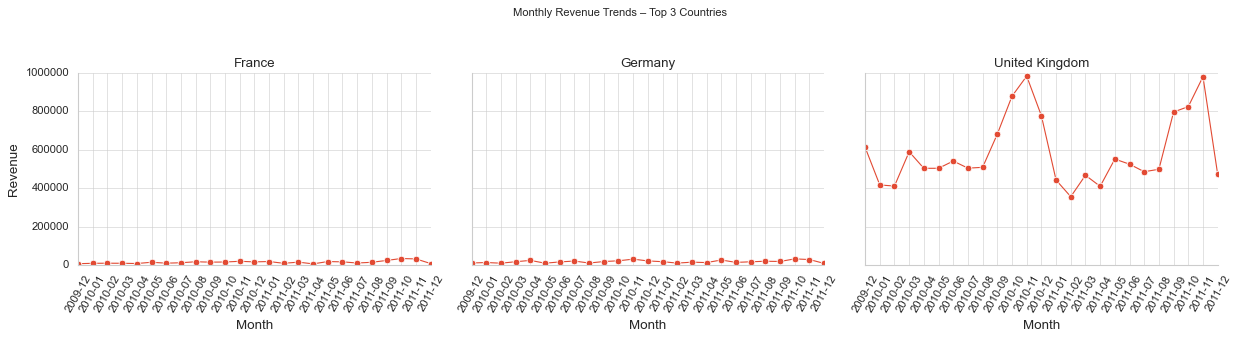

In [92]:
g = sns.FacetGrid(df_subset_grouped, col='Country', col_wrap=3, height=4, aspect=1.3)
g.map_dataframe(sns.lineplot, x='Month', y='Revenue', marker='o')
g.set_titles("{col_name}")
g.set_xticklabels(rotation=60)
g.figure.suptitle("Monthly Revenue Trends – Top 3 Countries", y=1.05)
plt.tight_layout()
plt.show()


# Plotly

In [93]:
!pip install plotly
!pip install -U nbformat

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [94]:
import nbformat
print(nbformat.__version__)

5.10.4


In [95]:
import plotly.express as px

In [96]:
df_sample.head()

,Quantity,Price,Revenue,Country,Month
0,12,6.95,83.4,United Kingdom,2009-12
1,12,6.75,81.0,United Kingdom,2009-12
2,12,6.75,81.0,United Kingdom,2009-12
3,48,2.10,100.8,United Kingdom,2009-12
4,24,1.25,30.0,United Kingdom,2009-12


In [97]:
monthly_rev = df_sample.groupby('Month')['Revenue'].sum().reset_index()
monthly_rev.head()

,Month,Revenue
0,2009-12,686654.160
1,2010-01,557319.062
2,2010-02,506371.066
3,2010-03,699608.991
4,2010-04,594609.192


In [102]:
fig = px.line(monthly_rev,
              x='Month', y='Revenue',
              markers=True)

fig.update_layout(xaxis_title="Month", yaxis_title="Revenue",
                  xaxis_tickangle=45, title='Monthly Revenue Trend',
                  plot_bgcolor='black')

# update_layout changes how the overall chart looks like

fig.show()


In [104]:
# Bar Plot – Top 10 Countries by Revenue

top_countries = df_sample.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10).reset_index()

fig = px.bar(top_countries,
             x='Country', y='Revenue',
             title='Top 10 Countries by Revenue',
             text='Revenue', color='Country')

# update_traces - properties of data like, line style, text label, hover info, marker size / color

fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(xaxis_tickangle=45, showlegend=False)
fig.show()

# 15234 --> 2 significant digits --> 15k
# 150234 --> 150k
# M -->million
# K -> Thousand



In [105]:
#  Scatter Plot – Price vs Quantity with Revenue as Size

fig = px.scatter(df_sample.sample(1000),
                 x='Quantity', y='Price',
                 size='Revenue', color='Country',
                 hover_data=['Revenue', 'Month'],
                 title='Price vs Quantity (Bubble = Revenue)')

fig.update_layout(xaxis_type='log', yaxis_type='log')
fig.show()

In [106]:
df_sample.columns

Index(['Quantity', 'Price', 'Revenue', 'Country', 'Month'], dtype='object')

In [107]:
fig = px.scatter(df_sample.sample(1000),
                 x='Quantity', y='Price',
                 size='Revenue', color='Country',
                 hover_data={'Quantity': True, 'Price':True, 'Revenue':False, 'Country':False, 'Month':True},
                 title='Price vs Quantity (Bubble = Revenue)')

fig.update_layout(xaxis_type='log', yaxis_type='log')
fig.show()

In [108]:
# Axis formatting

fig = px.bar(top_countries.head(5),
             x='Country', y='Revenue',
             text='Revenue',
             color='Country',
             title='Top 5 Countries by Revenue')

fig.update_layout(
    xaxis_title="Country (Top 5)",
    yaxis_title="Revenue in USD",
    xaxis_tickangle=45,
    yaxis_tickformat=",",  # adds commas to big numbers
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()


In [111]:
# Custom Colors and Palettes

color_map = {
    'United Kingdom': '#1f77b4',
    'Germany': '#ff7f0e',
    'France': '#2ca02c',
    'EIRE': '#d62728',
    'Netherlands': '#9467bd'
}

fig = px.bar(top_countries.head(5),
             x='Country', y='Revenue',
             text='Revenue',
             color='Country',
             color_discrete_map=color_map)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [116]:
# Background and Grid Styling

color_map = {
    'United Kingdom': '#1f77b4',
    'Germany': '#ff7f0e',
    'France': '#2ca02c',
    'EIRE': '#d62728',
    'Netherlands': '#9467bd'
}

fig = px.bar(top_countries.head(5),
             x='Country', y='Revenue',
             text='Revenue',
             color='Country',
             color_discrete_map=color_map)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='#f8f8f8',
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
)

fig.show()

In [120]:
# Legend Customization

color_map = {
    'United Kingdom': '#1f77b4',
    'Germany': '#ff7f0e',
    'France': '#2ca02c',
    'EIRE': '#d62728',
    'Netherlands': '#9467bd'
}

fig = px.bar(top_countries.head(5),
             x='Country', y='Revenue',
             text='Revenue',
             color='Country',
             color_discrete_map=color_map)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    showlegend=True,
    legend_title="Countries",
    legend=dict(
        orientation='h',  # horizontal
        yanchor='bottom', y=1.02,
        xanchor='right', x=1
    )
)
fig.show()

In [123]:
# Fonts, Titles, and Global Style

fig = px.scatter(df_sample.sample(1000),
                 x='Quantity', y='Price',
                 color='Country',
                 size='Revenue',
                 hover_data=['Revenue', 'Month'])

fig.update_layout(
    title=dict(
        text="Styled Top Countries by Revenue",
        font=dict(size=20, color='darkblue', family='Arial'),
        x=0.5  # center the title
    ),
    font=dict(family="Verdana", size=14, color="black"),
)

fig.show()

# Dashboard

In [124]:
!pip install dash

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


# More plots

In [126]:
filtered_df = df_sample[(df_sample['Revenue'] < 1000) & (df_sample['Revenue'] > 0)]

In [127]:
# Histogram – Price Distribution

In [128]:
# Histogram – Price Distribution

monthly_revenue = (
    filtered_df.groupby(['Country', 'Month'])['Revenue']
    .sum()
    .reset_index()
)

# Focus on top 5 countries only
top_countries = monthly_revenue.groupby('Country')['Revenue'].sum().nlargest(5).index
monthly_revenue_top5 = monthly_revenue[monthly_revenue['Country'].isin(top_countries)]

In [131]:
fig = px.bar(
    monthly_revenue_top5,
    x='Month',
    y='Revenue',
    color='Country',
    title='Monthly Revenue (Top 5 Countries, Filtered Revenue < 1000)',
    barmode='group'
)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Revenue',
    xaxis_tickangle=45
)

fig.show()

In [137]:
# Pie Chart – Country Revenue Share
# Each country's share of total revenue

country_rev = df_sample.groupby('Country')['Revenue'].sum().nlargest(5).reset_index()

fig = px.pie(country_rev, names='Country', values='Revenue',
             title='Top 5 Countries by Revenue Share',
             hole=0.4)  # donut style

fig.update_traces(textinfo='percent+label')

fig.show()

In [ ]:
#  Treemap – Revenue by Country and Month

df_tree = df_sample.groupby(['Country', 'Month'])['Revenue'].sum().reset_index()
top_countries = df_tree.groupby('Country')['Revenue'].sum().nlargest(5).index
df_tree = df_tree[df_tree['Country'].isin(top_countries)]

fig = px.treemap(df_tree, path=['Country', 'Month'], values='Revenue',
                 title='Revenue by Country and Month')
fig.show()

# country > Month > Revenue

In [140]:
#  Sunburst Chart (Same as Treemap, but Circular)

fig = px.sunburst(df_tree, path=['Country', 'Month'], values='Revenue',
                  title='Sunburst of Revenue by Country/Month')
fig.show()

# DATA Visualization Completed